**TODO:**
- check which of the grid packages I can get out of the equation

# Scholar Data 2 Website (or WordPress blog) with R 
This tutorial & code pulls data from the google scholar API, and makes an image (along with an optional graph of your citations per year) that can be hosted online (maybe using services like Dropbox or GoogleDrive's public sharing).

This tutorial is based on an R-bloggers post by XXX with some **graphical changes *and* the ability to display a bit more of useful info.**

## What you need
- a google scholar profile (e.g., INSERT MY GSCHOLAR PROFILE)
- UNIX-based system (e.g., Mac OS X, Linux)
- R (R Website) 
- crontab
- R packages:
    - `scholar`: convenience functions to get data from scholar API
    - `ggplot2`: powerful & flexible plotting package.
    - `grid` : package part of the R-base packages, allows graph layout customisations.


## `Scholar` R Package
James Keirstead, designed a really cool package that interacts with the google scholar API. It pulls data from your scholar profile, like your citation history, and it also contains a cool function to predict your h-index based on the [Acuna et al. (2012)](http://www.nature.com/nature/journal/v489/n7415/full/489201a.html) model which is fine tuned for neuroscience. You can find more info about the R package and its functions on [James' blog](http://www.jameskeirstead.ca/blog/new-r-package-scholar/).

### 1. Getting data from a profile
First, you need to know your **Researcher ID** that google arbitrarily created for you when you made your profile.

For example this is the URL to the profile of a really cool philosopher/psychologist called [Andy Clark](https://en.wikipedia.org/wiki/Andy_Clark). As an aside this researcher has a really interesting view on how the human brain function that is worth checking out if you're interested.
Anyway, back to the URL to his profile: https://scholar.google.co.uk/citations?user=FYrnmlIAAAAJ&hl=en.    
If you look at the URL there is an arbitrary looking string of characters just after `user=` and it stops at the `&` for Andy's profile it's `FYrnmlIAAAAJ`.

#### 1.1. Profile

In [3]:
#load the package first otherwise R won't be able to find the functions later.
library(scholar)

#load your profile data FYrnmlIAAAAJ
profile=get_profile('FYrnmlIAAAAJ')

#look at the information you pulled out
profile

$id
[1] "FYrnmlIAAAAJ"

$name
[1] "Andy Clark"

$affiliation
[1] "University of Edinburgh"

$total_cites
[1] 21866

$h_index
[1] 51

$i10_index
[1] 112

$fields
[1] "philosophy of cognitive science"

$homepage
[1] "http://www.philosophy.ed.ac.uk/people/view.php?name=andy-clark-frse"

As you can see, the function has pulled out all the information that you could see on the google page, and it has stored them in sub fields so that you can easily access **just** the *number of citations* or his *h-index* etc.

In [4]:
#here's how you get only the total citations
profile$total_cites

[1] 21866

In [5]:
#here's how you get the h-index
profile$h_index

[1] 51

#### 1.2. Citation history
You may also be interested in reproducing the graph that google generates with your citation history. For this we will use the function `get_citation_history()`. We now have a neat little table that contains number of citations per year. Grea! So we can reproduce the google plot!

In [6]:
history=get_citation_history('FYrnmlIAAAAJ')
history

,year,cites
1,2007,1079
2,2008,1382
3,2009,1320
4,2010,1574
5,2011,1564
6,2012,1671
7,2013,2604
8,2014,2192
9,2015,1679


## Plotting Scholar Cites
I'm using the `ggplot2` R package. It's one of the most popular graphing packages and is super flexible. I'm going to skip over explaining how ggplot works because there are a million tutorials online.

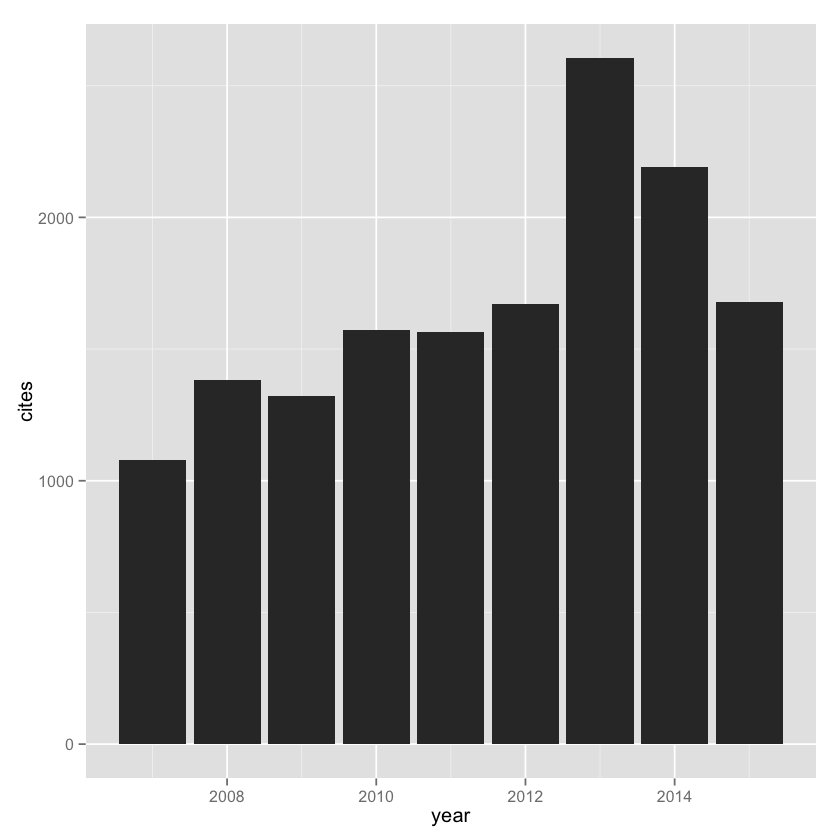

In [15]:
library(ggplot2)

#set up plot in r 
histGraph=ggplot(data=history, aes(x=year, y=cites))

#add layers of plot (here bars)
histGraph=histGraph+geom_bar(stat='identity')

#show basic graph
histGraph